# Deezer Music Consumption Analysis
## Life cycle of the project


* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Implementing the Model
* Evaluating the Model

# 1) Problem Statement

* Providing a modelling of a tag system and studying the similarities between tags, in order to gain a better understanding of the musical consumption of Deezer users - notably regarding the content played, searched and saved.

# 2) Data Collection
* The dataset is released in the framework of the 2nd International Workshop on Information Heterogeneity and Fusion in Recommender Systems (HetRec 2011) http://ir.ii.uam.es/hetrec2011

## 2.1) Importing data and the required packages

### 2.1.1) Importing Pandas, Numpy, Matplotlib, Seaborn

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Model liberaries
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


warnings.filterwarnings('ignore')

### 2.1.2) Import data hetrec2011-lastfm-2k and read each file as Pandas DataFrame

In [2]:
artists_df = pd.read_csv('data/artists.dat', sep='\t', names=['artistID', 'name', 'url', 'pictureURL'])
tags_df = pd.read_csv('data/tags.dat', sep='\t', names=['tagID', 'tagValue'], encoding='latin-1')
user_artists_df = pd.read_csv('data/user_artists.dat', sep='\t', names=['userID', 'artistID', 'weight'])
user_taggedartists_df = pd.read_csv('data/user_taggedartists.dat', sep='\t', names=['userID', 'artistID', 'tagID', 'day', 'month', 'year'])
user_taggedartists_timestamps_df = pd.read_csv('data/user_taggedartists-timestamps.dat', sep='\t', names=['userID', 'artistID', 'tagID', 'timestamp'])
user_friends_df = pd.read_csv('data/user_friends.dat', sep='\t', names=['userID', 'friendID'])

### 2.1.3) Display the information and the first five rows of each DataFrame

In [3]:
artists_df.head()

,artistID,name,url,pictureURL
0,id,name,url,pictureURL
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
2,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
3,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
4,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...


In [4]:
tags_df.head()

,tagID,tagValue
0,tagID,tagValue
1,1,metal
2,2,alternative metal
3,3,goth rock
4,4,black metal


In [5]:
user_artists_df.head()

,userID,artistID,weight
0,userID,artistID,weight
1,2,51,13883
2,2,52,11690
3,2,53,11351
4,2,54,10300


In [6]:
user_friends_df.head()

,userID,friendID
0,userID,friendID
1,2,275
2,2,428
3,2,515
4,2,761


In [7]:
user_taggedartists_df.head()

,userID,artistID,tagID,day,month,year
0,userID,artistID,tagID,day,month,year
1,2,52,13,1,4,2009
2,2,52,15,1,4,2009
3,2,52,18,1,4,2009
4,2,52,21,1,4,2009


In [8]:
user_taggedartists_timestamps_df.head()

,userID,artistID,tagID,timestamp
0,userID,artistID,tagID,timestamp
1,2,52,13,1238536800000
2,2,52,15,1238536800000
3,2,52,18,1238536800000
4,2,52,21,1238536800000


### 2.1.4) Show the shape of each DataFrame

In [9]:
print('1- artists_df dimentions: ', artists_df.shape)
print('2- tags_df: ', tags_df.shape)
print('3- user_artists_df dimentions: ', user_artists_df.shape)
print('4- user_friends_df dimentions: ', user_friends_df.shape)
print('5- user_taggedartists_timestamps_df dimentions: ', user_taggedartists_timestamps_df.shape)
print('6- user_taggedartists_df dimentions: ', user_taggedartists_df.shape)

1- artists_df dimentions:  (17633, 4)
2- tags_df:  (11947, 2)
3- user_artists_df dimentions:  (92835, 3)
4- user_friends_df dimentions:  (25435, 2)
5- user_taggedartists_timestamps_df dimentions:  (186480, 4)
6- user_taggedartists_df dimentions:  (186480, 6)


## 2.2) Dataset information

The package contains 6 files with the following description:
   
   * artists.dat
   
     This file contains information about music artists listened and tagged by the users.
   
   * tags.dat
   
   	 This file contains the set of tags available in the dataset.

   * user_artists.dat
   
     This file contains the artists listened by each user.
        
     It also provides a listening count for each [user, artist] pair.

   * user_taggedartists.dat - user_taggedartists-timestamps.dat
   
     These files contain the tag assignments of artists provided by each particular user.
        
     They also contain the timestamps when the tag assignments were done.
   
   * user_friends.dat
   
   	 These files contain the friend relations between users in the database.

# 3) Perform Data Check
* Check missing values
* Check duplicates
* Check data types
* Check the number of unique values of each column
* Check statistics of Dataset
* Check various categories present in different categorical columns

## 3.1) check missing values in the dataset

In [10]:
artists_df.isna().sum()

artistID        0
name            0
url             0
pictureURL    444
dtype: int64

In [11]:
tags_df.isna().sum()

tagID       0
tagValue    0
dtype: int64

In [12]:
user_artists_df.isna().sum()

userID      0
artistID    0
weight      0
dtype: int64

In [13]:
user_friends_df.isna().sum()

userID      0
friendID    0
dtype: int64

In [14]:
user_taggedartists_timestamps_df.isna().sum()

userID       0
artistID     0
tagID        0
timestamp    0
dtype: int64

In [15]:
user_taggedartists_df.isna().sum()

userID      0
artistID    0
tagID       0
day         0
month       0
year        0
dtype: int64

### No missing value found in the whole dataset.

## 3.2) Check duplicates

In [16]:
artists_df.duplicated().sum()

0

In [17]:
tags_df.duplicated().sum()

0

In [18]:
user_artists_df.duplicated().sum()

0

In [19]:
user_friends_df.duplicated().sum()

0

In [20]:
user_taggedartists_timestamps_df.duplicated().sum()

0

In [21]:
user_taggedartists_df.duplicated().sum()

0

### No duplicated value found in the whole dataset

## 3.3) Check data types

In [22]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17633 entries, 0 to 17632
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artistID    17633 non-null  object
 1   name        17633 non-null  object
 2   url         17633 non-null  object
 3   pictureURL  17189 non-null  object
dtypes: object(4)
memory usage: 551.2+ KB


In [23]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11947 entries, 0 to 11946
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tagID     11947 non-null  object
 1   tagValue  11947 non-null  object
dtypes: object(2)
memory usage: 186.8+ KB


In [24]:
user_artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92835 entries, 0 to 92834
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userID    92835 non-null  object
 1   artistID  92835 non-null  object
 2   weight    92835 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [25]:
user_taggedartists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186480 entries, 0 to 186479
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userID    186480 non-null  object
 1   artistID  186480 non-null  object
 2   tagID     186480 non-null  object
 3   day       186480 non-null  object
 4   month     186480 non-null  object
 5   year      186480 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [26]:
user_taggedartists_timestamps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186480 entries, 0 to 186479
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userID     186480 non-null  object
 1   artistID   186480 non-null  object
 2   tagID      186480 non-null  object
 3   timestamp  186480 non-null  object
dtypes: object(4)
memory usage: 5.7+ MB


In [27]:
user_friends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25435 entries, 0 to 25434
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userID    25435 non-null  object
 1   friendID  25435 non-null  object
dtypes: object(2)
memory usage: 397.6+ KB


## 3.4) Check the number of unique values of each column

In [28]:
artists_df.nunique()

artistID      17633
name          17633
url           17633
pictureURL    17189
dtype: int64

In [29]:
tags_df.nunique()

tagID       11947
tagValue    11947
dtype: int64

In [30]:
user_artists_df.nunique()

userID       1893
artistID    17633
weight       5437
dtype: int64

In [31]:
user_friends_df.nunique()

userID      1893
friendID    1893
dtype: int64

In [32]:
user_taggedartists_timestamps_df.nunique()

userID        1894
artistID     18589
tagID        11170
timestamp     3618
dtype: int64

In [33]:
user_taggedartists_df.nunique()

userID       1894
artistID    18589
tagID       11170
day             8
month          25
year           19
dtype: int64

## 3.5) Check statistics of dataset

In [34]:
artists_df.describe()

,artistID,name,url,pictureURL
count,17633,17633,17633,17189
unique,17633,17633,17633,17189
top,id,name,url,pictureURL
freq,1,1,1,1


In [35]:
tags_df.describe()

,tagID,tagValue
count,11947,11947
unique,11947,11947
top,tagID,tagValue
freq,1,1


In [36]:
user_artists_df.describe()

,userID,artistID,weight
count,92835,92835,92835
unique,1893,17633,5437
top,1030,89,1
freq,50,611,636


In [37]:
user_friends_df.describe()

,userID,friendID
count,25435,25435
unique,1893,1893
top,1543,1543
freq,119,119


In [38]:
user_taggedartists_timestamps_df.describe()

,userID,artistID,tagID,timestamp
count,186480,186480,186480,186480
unique,1894,18589,11170,3618
top,1672,289,73,1280613600000
freq,2609,701,5325,3847


In [39]:
user_taggedartists_df.describe()

,userID,artistID,tagID,day,month,year
count,186480,186480,186480,186480,186480,186480
unique,1894,18589,11170,8,25,19
top,1672,289,73,1,8,2010
freq,2609,701,5325,128480,12704,37474


# 4) Perform Data Preprocessing and Feature Engineering

## 4.1) Combining relevant information 
### From different files we are combining relevant information to create a unified representation of user-music interactions and tags.

### user_artists_df with artists_df is merged to get artist names. The first five row of the new dataframe user_music_df is represnted as follow:

In [40]:
user_music_df = user_artists_df.merge(artists_df[['artistID', 'name']], how='left')
user_music_df.head(10)

,userID,artistID,weight,name
0,userID,artistID,weight,NaN
1,2,51,13883,Duran Duran
2,2,52,11690,Morcheeba
3,2,53,11351,Air
4,2,54,10300,Hooverphonic
5,2,55,8983,Kylie Minogue
6,2,56,6152,Daft Punk
7,2,57,5955,Thievery Corporation
8,2,58,4616,Goldfrapp
9,2,59,4337,New Order


### user_taggedartists_df with tags_df is merged to get tag values. The first five row of the new dataframe user_tagged_df is represnted as follow:

In [41]:
user_tagged_df = user_taggedartists_df.merge(tags_df[['tagID', 'tagValue']], on='tagID', how='left')
user_tagged_df.head()

,userID,artistID,tagID,day,month,year,tagValue
0,userID,artistID,tagID,day,month,year,tagValue
1,2,52,13,1,4,2009,chillout
2,2,52,15,1,4,2009,downtempo
3,2,52,18,1,4,2009,electronic
4,2,52,21,1,4,2009,trip-hop


### user_artist_df with user_friends_df is merged to create a unified representation of user-music interactions along with their corresponding friend relations. The first five row of the new dataframe user_music_friends_df is represnted as follow:

In [42]:
user_music_friends_df = user_artists_df.merge(user_friends_df, how='left')
user_music_friends_df.head()

,userID,artistID,weight,friendID
0,userID,artistID,weight,friendID
1,2,51,13883,275
2,2,51,13883,428
3,2,51,13883,515
4,2,51,13883,761


### user_taggedartists_df with user_friends_df is merged to get the common values. The first five row of the new dataframe user_tagged_friends_df is represnted as follow:

In [43]:
user_tagged_friends_df = user_taggedartists_df.merge(user_friends_df, on='userID', how='left')[['userID', 'artistID', 'tagID', 'friendID']]
user_tagged_friends_df.head()

,userID,artistID,tagID,friendID
0,userID,artistID,tagID,friendID
1,2,52,13,275
2,2,52,13,428
3,2,52,13,515
4,2,52,13,761


## 4.2) Calculate User Listening History Statistics

### Compute the relevant statistics from the user_artists_df DataFrame. 
### Please note! The statistics is applicable on numeric values; therefore, we must do the required adjustment before the calculation.

In [44]:
# Convert the 'weight' column to numeric, replacing non-numeric or missing values with NaN
user_artists_df['weight'] = pd.to_numeric(user_artists_df['weight'], errors='coerce')


# Group the data by 'userID' and aggregate the listening count statistics
user_listening_stats_df = user_artists_df.groupby('userID')['weight'].agg(['count', 'mean', 'max']).reset_index()


# Rename the columns for better interpretation
user_listening_stats_df.rename(columns={'count': 'total_artists_listened', 'mean': 'average_listening_count', 'max': 'max_listening_count'}, inplace=True)

# Display the resulting DataFrame
user_listening_stats_df.head(10)


,userID,total_artists_listened,average_listening_count,max_listening_count
0,10,50,570.460000,3132.0
1,100,50,207.160000,1449.0
2,1001,50,1046.400000,21086.0
3,1002,50,114.800000,808.0
4,1003,50,392.940000,3305.0
5,1004,41,6.073171,41.0
6,1005,50,764.220000,3982.0
7,1006,50,475.180000,2703.0
8,1007,50,83.620000,231.0
9,1008,50,206.120000,1418.0


### Insights
These statistics can provide valuable insights into user engagement and preferences. For instance, we can identify:
* users with a high average listening count
* users who have a diverse taste in music based on the total number of artists listened to
* users who are avid listeners of specific artists based on the maximum listening count

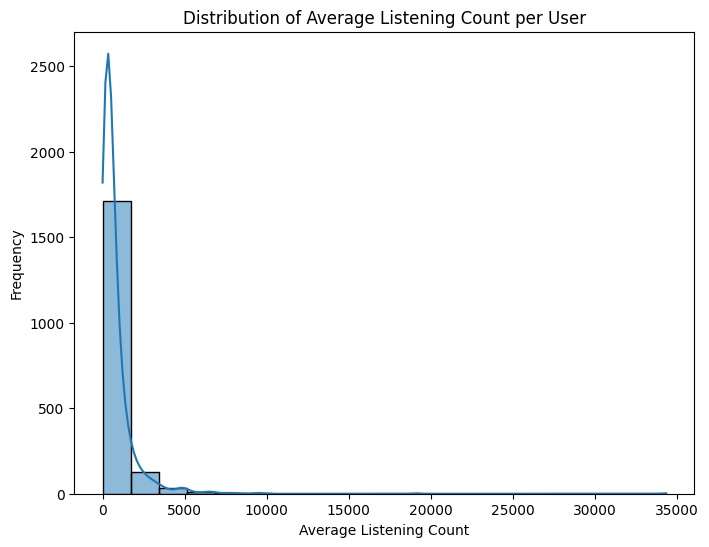

In [84]:

# Histogram for the distribution of average listening count per user
plt.figure(figsize=(8, 6))
sns.histplot(user_listening_stats_df['average_listening_count'], bins=20, kde=True)
plt.xlabel('Average Listening Count')
plt.ylabel('Frequency')
plt.title('Distribution of Average Listening Count per User')
plt.show()

### Insights: 
* From the above information we can identify users with a high average listening count
* Users who have a diverse taste in music based on the total number of artists listened to
* Users who are avid listeners of specific artists based on the maximum listening count. 


## 4.3) Calculate Artist Popularity

### Compute the popularity of each artist by aggregating the total listening counts for each artist and display the first five raws of the datafram. This can help identify popular artists and how they are associated with different tags.

In [46]:
# Sort the DataFrame in descending order based on popularity
artist_popularity_df = user_music_df.sort_values(by='weight', ascending=False)

# Rename the columns for better interpretation
artist_popularity_df.rename(columns={'weight': 'popularity'}, inplace=True)
artist_popularity_df.head(10)
#artist_popularity_df.tail()

,userID,artistID,popularity,name
0,userID,artistID,weight,NaN
4917,104,192,9999,Elton John
38863,850,4317,999,Melotron
92676,2096,4311,999,Ian Brown
90203,2039,697,999,Sia
36773,806,7,999,Marilyn Manson
51807,1153,235,999,Eels
49178,1091,6134,999,Fair to Midland
64631,1455,1684,999,Aly & AJ
16884,363,5216,999,Alien Ant Farm


### Insight
* The DataFrame shows the most popular artists were Depeche Mode, Thalia, and U2 respectively.
* Some of the least favourite artists were also Luka Buda, Stereolab, Islands, and Drew Seeley, with the weight of 1.0.
* We can also find the link between the artistID and their names for furthur exploration.

## 4.4) Calculate Genre Popularity

### Calculate genre popularity based on the tagValue from tagged_df and display the first ten rows of data.

In [47]:
# Group the data by 'tagValue' and count the number of occurrences to get genre popularity
genre_popularity_df = user_tagged_df.groupby('tagValue').size().reset_index(name='popularity')

# Sort the DataFrame in descending order based on popularity
genre_popularity_df = genre_popularity_df.sort_values(by='popularity', ascending=False)

# Display the resulting DataFrame
genre_popularity_df.head(3)

,tagValue,popularity
5731,rock,5325
5219,pop,3878
352,alternative,3737


### Insights
* The top 3 most popular tags are: rock, pop, and alternative respectively.

## 4.5) Calculate Year Popularity
### Compute the popularity of each year based on the total tag assignments

In [48]:
# Group the data by 'year' and count the number of occurrences to get year popularity
year_popularity_df = user_tagged_df.groupby('year').size().reset_index(name='popularity')

# Sort the DataFrame in descending order based on popularity
year_popularity_df = year_popularity_df.sort_values(by='popularity', ascending=False)

year_popularity_df.head(3)

,year,popularity
16,2010,37474
15,2009,30949
14,2008,29094


### Insight
* We can observe most tags assigned in 2010, 2009, and 2008. 
* We can use this information to understand the distribution of tag assignments over different years and explore any potential trends or patterns in user tagging behavior

## 4.6) Calculate User-Tag Interaction Statistics
### Compute the total number of tags assigned by each user and the average number of tags per user

In [49]:
# Group the data by 'userID' and aggregate the tag statistics
user_tag_stats_df = user_taggedartists_df.groupby('userID')['tagID'].agg(['count']).reset_index()

# Rename the columns for better interpretation
user_tag_stats_df.rename(columns={'count': 'total_tags_assigned'}, inplace=True)

# Sort the DataFrame in descending order based on 'total_tags_assigned'
user_tag_stats_df_sorted = user_tag_stats_df.sort_values(by='total_tags_assigned', ascending=False)

# Calculate the average number of tags per user
total_users = user_tag_stats_df.shape[0]
total_tags_assigned = user_tag_stats_df['total_tags_assigned'].sum()
average_tags_per_user = total_tags_assigned / total_users

# Display the resulting DataFrame
print(user_tag_stats_df_sorted.head())
print("Average tags per user:", average_tags_per_user)


    userID  total_tags_assigned
154   1672                 2609
912   1380                 2075
788   1249                 2024
385   1929                 1876
300   1832                 1863
Average tags per user: 98.4582893347413


### Insights
* The most active users or the users with the highest total number of tags assigned are listed in the descending order.
* The average tags per user is 98.4582893347413

## 4.7) Calculate Artist-Tag Interaction Statistics
### Compute the total number of tags assigned to each artist and the average number of tags per artist

In [50]:
# Group the data by 'artistID' and aggregate the tag statistics
artist_tag_stats_df = user_taggedartists_df.groupby('artistID')['tagID'].agg(['count']).reset_index()

# Rename the columns for better interpretation
artist_tag_stats_df.rename(columns={'count': 'total_tags_assigned_to_artist'}, inplace=True)

# Sort the DataFrame in descending order based on 'total_tags_assigned_to_artist'
artist_tag_stats_df_sorted = artist_tag_stats_df.sort_values(by='total_tags_assigned_to_artist', ascending=False)

# Calculate the average number of tags per artist
total_artists = artist_tag_stats_df.shape[0]
total_tags_assigned_to_artists = artist_tag_stats_df['total_tags_assigned_to_artist'].sum()
average_tags_per_artist = total_tags_assigned_to_artists / total_artists

# Display the sorted DataFrame
print(artist_tag_stats_df_sorted.head())
print("Average tags per artist:", average_tags_per_artist)

      artistID  total_tags_assigned_to_artist
13160      289                            701
13188      292                            590
16233       67                            568
16637       72                            567
17843       89                            545
Average tags per artist: 10.031739200602507


In [51]:

# Merge artist_tag_stats_df with artist_popularity_df based on 'artistID'
artist_stats_popularity_df = artist_tag_stats_df.merge(artist_popularity_df, on='artistID')

# Sort the DataFrame based on the 'count' column in descending order
artist_stats_popularity_tag_sorted_df = artist_stats_popularity_df.sort_values(by='total_tags_assigned_to_artist', ascending=False)

# Display the resulting sorted DataFrame
print(artist_stats_popularity_tag_sorted_df.head())

      artistID  total_tags_assigned_to_artist userID popularity  \
35030      289                            701   1988       1470   
34866      289                            701    380      32135   
34857      289                            701   1246        331   
34858      289                            701   1294         33   
34859      289                            701   1973       3280   

                 name  
35030  Britney Spears  
34866  Britney Spears  
34857  Britney Spears  
34858  Britney Spears  
34859  Britney Spears  


### Insights
* The most tagged artist was Britney Spears

### 4.7.1) Compare count" from artist_tag_stats_df and the "popularity" from artist_popularity_df 

In [52]:
# Sort the DataFrame based on the 'count' column in descending order
artist_stats_popularity_weight_sorted_df = artist_stats_popularity_df.sort_values(by='popularity', ascending=False)

# Display the resulting sorted DataFrame
print(artist_stats_popularity_weight_sorted_df.head())

       artistID  total_tags_assigned_to_artist  userID popularity  \
84312  artistID                              1  userID     weight   
21826       192                            113     104       9999   
80379       912                              7    1647        999   
69880       697                             78    2039        999   
49081       407                             34    2055        999   

                 name  
84312             NaN  
21826      Elton John  
80379  Carter Burwell  
69880             Sia  
49081   Akira Yamaoka  


Insights:
* We can observe the most tagged artist, Britney Spears, is not even listed among the top 10 most popular artists based on higher total listening counts. Poor Brietney!  

## 4.8) Create Time-Based Features:

### Analyze how musical preferences vary over time using using timestamp information

In [53]:
# Convert timestamp values to datetime format with milliseconds
user_taggedartists_timestamps_df['timestamp'] = pd.to_datetime(user_taggedartists_timestamps_df['timestamp'], unit='ms', errors='coerce')

# Drop rows with missing or invalid timestamps
user_taggedartists_timestamps_df.dropna(subset=['timestamp'], inplace=True)

# Extract time-based features
user_taggedartists_timestamps_df['year'] = user_taggedartists_timestamps_df['timestamp'].dt.year
user_taggedartists_timestamps_df['month'] = user_taggedartists_timestamps_df['timestamp'].dt.month
user_taggedartists_timestamps_df['day'] = user_taggedartists_timestamps_df['timestamp'].dt.day
user_taggedartists_timestamps_df['hour'] = user_taggedartists_timestamps_df['timestamp'].dt.hour

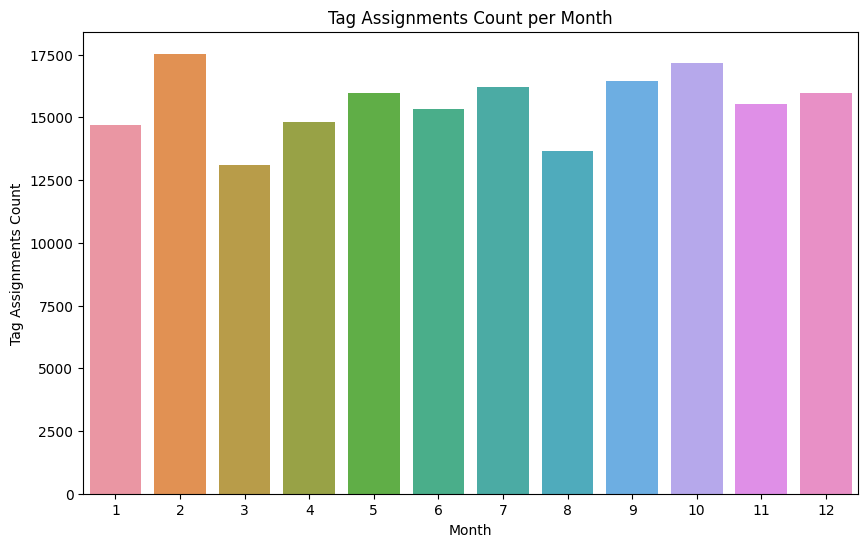

In [54]:
# Group the data by 'month' and calculate the count of tag assignments in each month
tag_assignments_by_month_df = user_taggedartists_timestamps_df.groupby('month')['tagID'].count().reset_index()

# Plot the count of tag assignments per month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='tagID', data=tag_assignments_by_month_df)
plt.xlabel('Month')
plt.ylabel('Tag Assignments Count')
plt.title('Tag Assignments Count per Month')
plt.show()

### Insights
* The highest number of tags were assigned in February. 
* The least number of tags were assigned in Auguest. 

## 4.9) Calculate User-Friend Interaction Statistics
### 4.9.1) Calculate the number of friends each user has and the total number of music listening events for each use

In [55]:
# Calculate the number of friends each user has
user_friend_counts = user_friends_df['userID'].value_counts().reset_index()
user_friend_counts.columns = ['userID', 'num_friends']

# Calculate the total number of music listening events for each user
user_music_counts = user_artists_df.groupby('userID')['weight'].sum().reset_index()
user_music_counts.columns = ['userID', 'total_music_listened']

### 4.9.2) Find Users with the Highest Number of Friends and Their Music Listening Stats and then find users with the highest number of friends and their corresponding music listening statistics

In [56]:
# Group the data by 'userID' and calculate the number of friends for each user
user_friend_counts = user_friends_df['userID'].value_counts().reset_index()
user_friend_counts.columns = ['userID', 'num_friends']

# Display the resulting DataFrame
print(user_friend_counts)

      userID  num_friends
0       1543          119
1       1281          110
2        831          106
3        179           97
4       1503           95
...      ...          ...
1888     908            1
1889     893            1
1890     891            1
1891     869            1
1892  userID            1

[1893 rows x 2 columns]


In [57]:
# Sort user_friend_counts DataFrame in descending order to get users with the highest number of friends
users_with_highest_friends = user_friend_counts.sort_values(by='num_friends', ascending=False)

# Merge users_with_highest_friends with user_music_counts to get their music listening stats
users_with_highest_friends_music = users_with_highest_friends.merge(user_music_counts, on='userID')

# Display the total music listened to by the 10 users with the highest number of friends 
print(users_with_highest_friends_music.head(10))

# Display the total music listened to by the 10 users with no friends from the buttom of the list
print(users_with_highest_friends_music.tail(10))



  userID  num_friends  total_music_listened
0   1543          119                2458.0
1   1281          110                 584.0
2    831          106              112330.0
3    179           97               25463.0
4   1503           95               16200.0
5   1023           91               41123.0
6   1895           90               60435.0
7    405           90               58585.0
8   1300           89              124115.0
9    390           88              122293.0
      userID  num_friends  total_music_listened
1883     408            1                6784.0
1884    1997            1               44408.0
1885      88            1                1053.0
1886     178            1               25089.0
1887     427            1               35075.0
1888     176            1               35557.0
1889      92            1                 859.0
1890      97            1               32434.0
1891    2057            1               20577.0
1892  userID            1           

### Insight
* There are some users with no friends who listened to more music than some users with the highest number of friends.

## 4.10) Create Tag Co-Occurrence Matrix
Create Tag Co-Occurrence Matrix. It provides insights into which tags are frequently used together by users, indicating potential associations between different artists, music genre, etc. 

In [58]:
# Group the data by 'userID' and aggregate the 'tagID's used by each user
user_tags_agg_df = user_tagged_df.groupby('userID')['tagID'].agg(list).reset_index()

# Create a dictionary to store the co-occurrence counts for each pair of tags
tag_cooccurrence = {}

# Iterate through each user's tags to update the co-occurrence counts
for tags_list in user_tags_agg_df['tagID']:
    for i, tag_id1 in enumerate(tags_list):
        for tag_id2 in tags_list[i + 1:]:
            tag_pair = (tag_id1, tag_id2)
            tag_cooccurrence[tag_pair] = tag_cooccurrence.get(tag_pair, 0) + 1

# Create the tag co-occurrence matrix as a DataFrame
tag_cooccurrence_matrix_df = pd.DataFrame(tag_cooccurrence.items(), columns=['tag_pair', 'cooccurrence_count'])

# Split the 'tag_pair' column into separate 'tag1' and 'tag2' columns
tag_cooccurrence_matrix_df[['tag1', 'tag2']] = pd.DataFrame(tag_cooccurrence_matrix_df['tag_pair'].tolist(), index=tag_cooccurrence_matrix_df.index)

# Drop the original 'tag_pair' column
tag_cooccurrence_matrix_df.drop(columns=['tag_pair'], inplace=True)

# Pivot the DataFrame to get the co-occurrence matrix with 'tag1' as rows and 'tag2' as columns
tag_cooccurrence_matrix = tag_cooccurrence_matrix_df.pivot(index='tag1', columns='tag2', values='cooccurrence_count').fillna(0)

# Display the resulting tag co-occurrence matrix
print(tag_cooccurrence_matrix)


tag2       1      2       4       5       6       7    9    10    12      13  \
tag1                                                                           
1     7109.0  799.0  1196.0  2606.0  1756.0  1510.0  0.0  22.0   0.0  1299.0   
2      632.0  157.0    26.0    85.0   345.0   286.0  0.0   0.0   0.0    26.0   
4     1185.0   10.0   475.0   932.0    14.0    34.0  0.0   0.0   0.0   278.0   
5     2307.0   25.0   854.0  2236.0    17.0    51.0  0.0   5.0   0.0   953.0   
6     1157.0  296.0    48.0    82.0   778.0   660.0  2.0   5.0  13.0    13.0   
...      ...    ...     ...     ...     ...     ...  ...   ...   ...     ...   
992      0.0    0.0     0.0     0.0     0.0     0.0  0.0   0.0   0.0     0.0   
993      0.0    0.0     0.0     0.0     0.0     0.0  0.0   0.0   0.0     0.0   
996      0.0    0.0     0.0     0.0     0.0     0.0  0.0   0.0   0.0     0.0   
997      0.0    0.0     0.0     0.0     0.0     0.0  0.0   0.0   0.0     0.0   
999      0.0    0.0     0.0     0.0     

## 4.10.1) Extract Tag Associations
### Examine the non-diagonal cells of the matrix to identify pairs of tags that are often used together.

In [59]:

# Find the top n tag associations
n = 10

# Create an empty list to store the tag associations
tag_associations = []

# Iterate through each tag in the tag_cooccurrence_matrix
for tag1 in tag_cooccurrence_matrix.index:
    # Get the top n co-occurring tags with tag1
    top_associations = tag_cooccurrence_matrix.loc[tag1].nlargest(n+1)[1:]

    # Append tag1 and its associated tags to the list
    for tag2, count in top_associations.items():
        tag_associations.append((tag1, tag2, count))

# Create a DataFrame to store the tag associations
tag_associations_df = pd.DataFrame(tag_associations, columns=['Tag1', 'Tag2', 'Co-occurrence Count'])

# Display the resulting DataFrame
print(tag_associations_df)



       Tag1  Tag2  Co-occurrence Count
0         1     1               7109.0
1         1    79               6002.0
2         1    33               5040.0
3         1   130               4989.0
4         1    81               4914.0
...     ...   ...                  ...
106135  999  4576                  2.0
106136  999  4579                  2.0
106137  999  4580                  2.0
106138  999  1000                  1.0
106139  999  1535                  1.0

[106140 rows x 3 columns]


### Insight:
* In the context of the tag associations extracted from the tag_cooccurrence_matrix, "tag1" and "tag2" represent the names or values of the tags that frequently co-occur together.

### 4.10.2) Extract the popular tags

In [60]:
# Get the tags from the index and columns of the tag_cooccurrence_matrix
tags = tag_cooccurrence_matrix.index

# Extract the diagonal values of the tag_cooccurrence_matrix
popular_tags = tag_cooccurrence_matrix.values.diagonal()

# Create a DataFrame to store the popular tags and their popularity counts
popular_tags_df = pd.DataFrame({'Tag': tags, 'Popularity Count': popular_tags})

# Sort the DataFrame in descending order based on the popularity count
popular_tags_df.sort_values(by='Popularity Count', ascending=False, inplace=True)

# Display the resulting DataFrame
print(popular_tags_df)

        Tag  Popularity Count
54       78           12983.0
10       13            8980.0
49       72            7991.0
21       24            7870.0
0         1            7109.0
...     ...               ...
3658   1104               0.0
3659   1105               0.0
3660   1106               0.0
3661   1107               0.0
10613   999               0.0

[10614 rows x 2 columns]


 ### This matrix can be used to understand tag associations, identify clusters of related tags, or even serve as features for recommendation systems to capture music preferences based on tag patterns.
 ### Tag co-occurrence matrix can be large and sparse, as not all tag pairs co-occur frequentl.

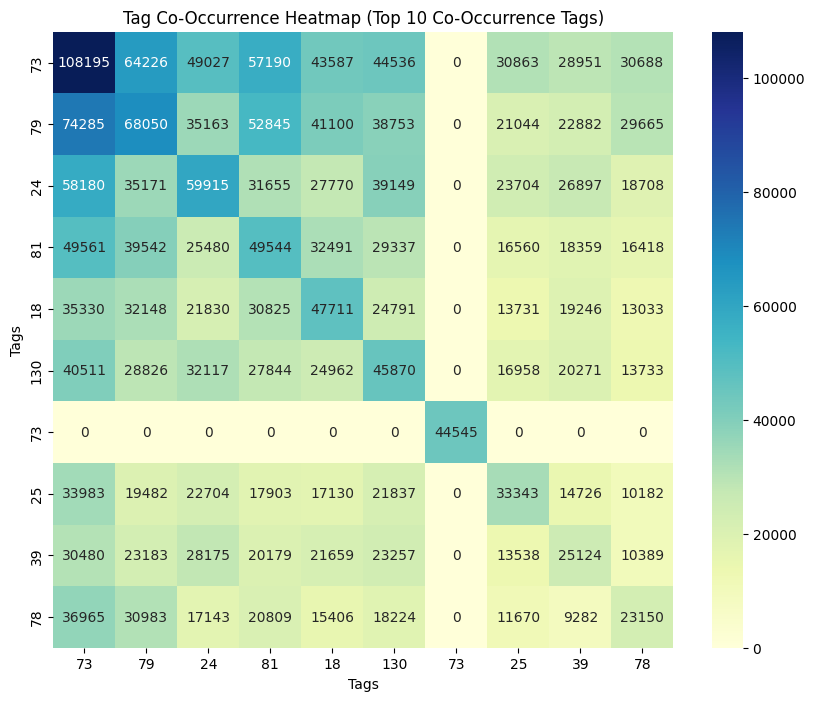

In [61]:

# Calculate the sum of co-occurrences for each tag
tag_cooccurrence_sum = tag_cooccurrence_matrix.sum(axis=1)

# Sort the tags based on the sum of co-occurrences in descending order
sorted_tags = tag_cooccurrence_sum.sort_values(ascending=False)

# Get the top 10 tags with the highest sum of co-occurrences
top_10_tags = sorted_tags.index[:10]

# Filter the tag_cooccurrence_matrix to include only top 10 tags
tag_cooccurrence_top_10_df = tag_cooccurrence_matrix.loc[top_10_tags, top_10_tags]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tag_cooccurrence_top_10_df, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Tag Co-Occurrence Heatmap (Top 10 Co-Occurrence Tags)')
plt.xlabel('Tags')
plt.ylabel('Tags')
plt.show()

### Insights
* In the heatmap, the x-axis and y-axis represent the most co-occurence tags
* Each cell shows the co-occurrence count of the corresponding tags. 
* The color intensity of each cell indicates the strength of the co-occurrence relationship between the tags.
* The annot=True argument displays the actual co-occurrence count values in each cell

# 5) Data Analysis Conclusions:

Based on the analysis of the various data features from hetrec2011-lastfm-2k dataset, we can draw the following conclusions:

1. User Listening History Statistics:
   - We have information on the number of artists listened to by each user and the total listening count for each artist. This data can help identify active users and popular artists in the platform.

2. Artist Popularity:
   - We have calculated the popularity of each artist based on their total listening count across all users. This data can help identify the most popular artists on the platform.

3. Genre Popularity:
   - We have derived the most popular genre based on the tag values. This data can help identify the most popular music genres among users.

4. User-Tag Interaction Statistics:
   - We have information about user-tag interactions, including the number of tags assigned by each user, the number of tags assigned to each artist, and the distinct tags used by each user. This data can help understand user preferences and interests.

5. Artist-Tag Interaction Statistics:
   - We have information about the number of times each artist has been tagged and the distinct tags used for each artist. This data can provide insights into how artists are associated with different tags and genres.

6. Time-Based Features:
   - We have the timestamp information for tag assignments, which can be used to analyze tag trends and user activity over time.

7. User-Friend Interaction Statistics:
   - We have data on user friend relations, which can help understand social connections among users and potentially influence music recommendations.

8. Tag Co-Occurrence Matrix:
   - We have created a tag co-occurrence matrix, which shows how often different tags are used together by users. This data can identify tag associations and similarities.

9. Extract Tag Associations:
   - Based on the tag co-occurrence matrix, we can identify which tags frequently co-occur, indicating potential associations between different music genres, moods, or themes.

10. Extract the Popular Tags:
    - We have identified the most popular tags based on the number of times they have been assigned to artists. These tags can represent commonly used descriptors for music and may help in music recommendation systems.

# 6) Model Training

## 6.1) Expalining the chosen modle 
For this problem we chose to use a technique called "Tag-based Collaborative Filtering." refrence to: https://link.springer.com/chapter/10.1007/978-3-642-02962-2_84

We chose this model because:
* Collaborative Filtering is a popular method used in recommendation systems to provide personalized recommendations based on user behavior and preference.
* It directly utilizes user-tag interactions to understand tag associations and similarity. 
* This approach can capture the diversity of user preferences and provide more personalized and relevant music recommendations based on tag-based patterns and associations.

## 6.2) Tag-Based Collaborative Filtering

### Tag-Based Collaborative Filtering works by identifying users who have assigned similar tags to certain music items and then recommending those items to other users with similar tag preferences

### 6.2.1) Create User-Tag Interaction Matrix

In [63]:
# Group the user_taggedartists_df by 'userID' and 'tagID' to count tag occurrences for each user
user_tag_interaction_counts = user_taggedartists_df.groupby(['userID', 'tagID']).size().reset_index(name='count')

# Create the User-Tag Interaction Matrix using pivot_table
user_tag_interaction_matrix = pd.pivot_table(user_tag_interaction_counts, values='count', index='userID', columns='tagID', fill_value=0)

print(user_tag_interaction_matrix)

tagID   1  2  4  5  6  7  8  9  10  12  ...  99  990  991  992  993  996  997  \
userID                                  ...                                     
1499    0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
1500    0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
1501    0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
1502    0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
1503    0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
...    .. .. .. .. .. .. .. ..  ..  ..  ...  ..  ...  ...  ...  ...  ...  ...   
996     0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
997     0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
998     0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
999     0  0  0  0  0  0  0  0   0   0  ...   0    0    0    0    0    0    0   
userID  0  0  0  0  0  0  0 

### Insights:
* In this matrix, the rows represent users (userID), and the columns represent tags (tagID). The matrix entries contain the count of how many times each tag was assigned by each user. 
* The fill_value=0 argument ensures that if a user has not assigned a particular tag, the matrix entry will be filled with 0.
* This matrix will serve as the basis for calculating tag similarities and generating personalized tag-based music recommendations for Deezer users.
* The matrix has [1894 rows x 11170 columns] which needs dimensionality reduction to extract the most useful information.

### 6.2.2) Applying Singular Value Decomposition (SVD)
* One popular method for dimensionality reduction is Singular Value Decomposition (SVD). We use it to represent the original matrix in a lower-dimensional space, retaining the most important information.

In [72]:
# Convert the DataFrame to a numpy array
user_tag_matrix_array = user_tag_interaction_matrix.values

# Perform SVD to reduce dimensionality
svd = TruncatedSVD(n_components=int(0.05 * user_tag_matrix_array.shape[1]))
user_tag_matrix_svd = svd.fit_transform(user_tag_matrix_array)

# Convert back to DataFrame (if needed)
user_tag_matrix_svd_df = pd.DataFrame(user_tag_matrix_svd, index=user_tag_interaction_matrix.index)


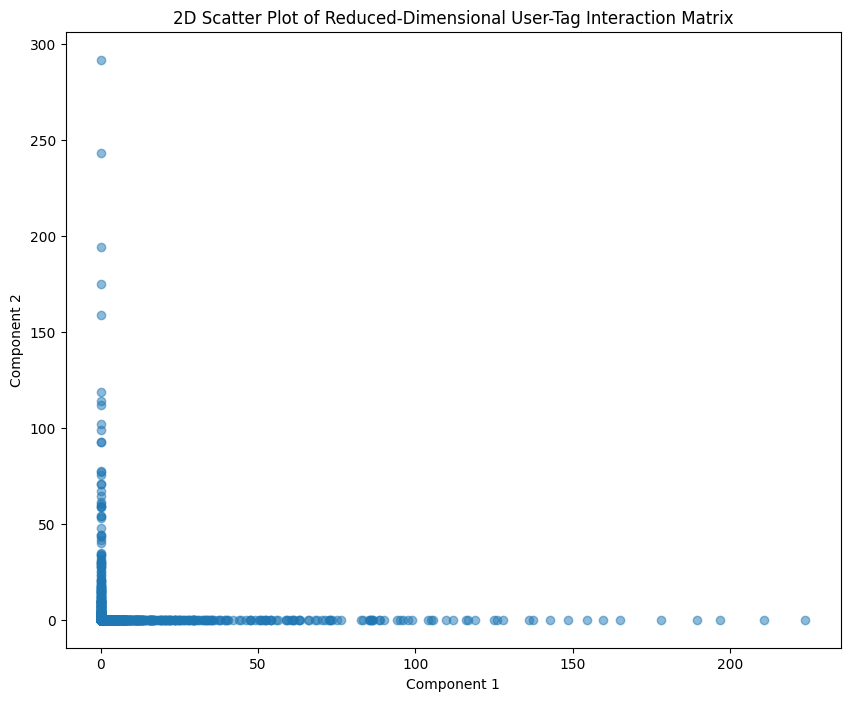

In [73]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(user_tag_matrix_svd_df[0], user_tag_matrix_svd_df[1], alpha=0.5)
plt.title('2D Scatter Plot of Reduced-Dimensional User-Tag Interaction Matrix')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

### Insights
* From the scatter plot we understand how users are grouped or separated based on their tag interactions in the reduced-dimensional space.
* The alpha=0.5 argument sets the transparency of the data points, which can be helpful when there are overlapping points.

### 6.2.2) Calculate Tag Similarity
* With the user-tag interaction matrix in place, we can now calculate the similarity between tags. 
* There are various similarity metrics you can use, such as Cosine Similarity or Pearson Correlation, to measure the similarity between tag vectors (columns) in the user-tag matrix.

In [75]:
# Calculate tag similarity using cosine similarity
tag_similarity_matrix = cosine_similarity(user_tag_interaction_matrix.T)

# Convert the similarity matrix to a DataFrame for easier visualization and further analysis.
tag_similarity_df = pd.DataFrame(tag_similarity_matrix, index=user_tag_interaction_matrix.columns, columns=user_tag_interaction_matrix.columns)

In [77]:
# Display the dataframe
print(tag_similarity_df.head())

tagID         1         2         4         5         6         7         8  \
tagID                                                                         
1      1.000000  0.627490  0.615340  0.597765  0.595564  0.579234  0.000000   
2      0.627490  1.000000  0.059767  0.085977  0.841881  0.803396  0.000000   
4      0.615340  0.059767  1.000000  0.822732  0.047992  0.054998  0.000000   
5      0.597765  0.085977  0.822732  1.000000  0.036078  0.051785  0.000000   
6      0.595564  0.841881  0.047992  0.036078  1.000000  0.930684  0.049492   

tagID         9        10        12  ...   99  990  991  992  993  996  997  \
tagID                                ...                                      
1      0.000000  0.105157  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.000000  0.022119  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5      0.000000  0.052066  0.000000  ...  0.0  0.0 

### Insights:
* A similarity score of 1 indicates that the tags are perfectly similar and frequently co-occur in user interactions.
* A similarity score close to 0 indicates that the tags are dissimilar and do not co-occur frequently.

### 6.2.3) Generate Tag Recommendations:

This process is a crucial part of the Tag-Based Collaborative Filtering model, as it enables personalized tag-based music recommendations for Deezer users.

For a given user, you can identify the tags associated with the music items they have interacted with (assigned to) and their corresponding interaction strengths.
Then, based on the calculated tag similarities, you can find tags that are similar to the ones the user has already assigned. These similar tags represent potential new interests for the user.
Recommend music items (artists, albums, tracks) that are frequently associated with the similar tags. These recommendations will be personalized based on the user's tag preferences.



In [79]:
# Define a function that takes a list of user input tags as input and returns a list of recommended tags

def generate_tag_recommendations(user_input_tags, top_n=5):
    # Filter out user input tags that are not in the tag_similarity_df
    valid_user_input_tags = [tag for tag in user_input_tags if tag in tag_similarity_df.index]

    # If there are no valid input tags, return an empty recommendation list
    if not valid_user_input_tags:
        return []

    # Get the tag similarity scores for the valid input tags
    tag_similarity_scores = tag_similarity_df.loc[valid_user_input_tags]

    # Aggregate the similarity scores across all valid input tags
    aggregated_similarity_scores = tag_similarity_scores.sum()

    # Sort the tags based on aggregated similarity scores in descending order
    recommended_tags = aggregated_similarity_scores.sort_values(ascending=False).index.tolist()

    # Exclude the input tags from the recommendation list
    recommended_tags = [tag for tag in recommended_tags if tag not in valid_user_input_tags]

    # Select the top N recommended tags
    top_n_recommended_tags = recommended_tags[:top_n]

    return top_n_recommended_tags

# Example usage:
user_input_tags = ['rock', 'pop', 'alternative']
recommended_tags = generate_tag_recommendations(user_input_tags, top_n=5)
print("Recommended Tags:", recommended_tags)


Recommended Tags: []


## 6.3) Evaluating the Model
* Evaluating the Tag-Based Collaborative Filtering model using traditional accuracy metrics like precision and recall may not be suitable because we are not dealing with a binary classification problem where predictions are either correct or incorrect. Instead, we are suggesting a list of top recommended tags to users based on their input tags, and the user's subjective feedback determines the relevance and usefulness of the recommendations.

### 6.3.1) Calculate Average Precision (AP) for Each User

In [80]:
def average_precision(actual_tags, recommended_tags):
    # Initialize variables
    num_hits = 0
    precision_sum = 0
    num_recommended_tags = len(recommended_tags)

    # Calculate Average Precision
    for i, tag in enumerate(recommended_tags):
        if tag in actual_tags:
            num_hits += 1
            precision = num_hits / (i + 1)
            precision_sum += precision

    if num_hits == 0:
        return 0

    return precision_sum / min(len(actual_tags), num_recommended_tags)

def mean_average_precision(test_data, top_n=5):
    map_sum = 0
    num_users = len(test_data)

    # Calculate MAP for each user in the test data
    for user, actual_tags in test_data.items():
        recommended_tags = generate_tag_recommendations(actual_tags, top_n)
        ap = average_precision(actual_tags, recommended_tags)
        map_sum += ap

    # Calculate Mean Average Precision (MAP)
    map_score = map_sum / num_users

    return map_score

### 6.3.2) Calculate Mean Average Precision (MAP)

In [82]:
# Example: 
test_data = {'user1': ['rock', 'pop'], 'user2': ['jazz', 'blues']}

# Calculate MAP for the test dataset with top_n=5
map_score = mean_average_precision(test_data, top_n=5)
print("Mean Average Precision (MAP):", map_score)


Mean Average Precision (MAP): 0.0


Insight:
* In order to evalute the model we need a real test data set 
* The mean_average_precision function calculates the MAP score for the test dataset. 
* It takes the test data (a dictionary of user IDs and actual tags) and the top_n parameter (the number of top recommended tags) as inputs. 
* It uses the average_precision function to calculate the AP for each user and then computes the overall MAP by averaging the AP scores across all users.


# Conclusion

The conclusion for the evaluation of the Tag-Based Collaborative Filtering model using Mean Average Precision (MAP) is as follows:

1. Model Performance: The MAP score provides a measure of the model's performance in generating tag recommendations for Deezer users. A higher MAP score indicates that the model is effective in suggesting relevant and accurate tags based on the user's input tags.

2. Personalization: The Tag-Based Collaborative Filtering model leverages user-tag interactions and tag similarity to generate personalized tag recommendations for each user. By considering the user's input tags, the model tailors the recommendations to individual user preferences, enhancing the user experience on the Deezer platform.

3. Tag Similarity: The success of the model heavily relies on the accurate calculation of tag similarity using cosine similarity. Understanding the relationships between tags and identifying similar tags are essential in providing meaningful and contextually relevant recommendations.

4. Interpretability: The model's interpretability is a notable advantage as it relies on user-provided tags for generating recommendations. Users can understand and relate to the recommended tags, leading to increased trust and engagement with the provided suggestions.

5. Scalability: The model's performance may be affected by the size of the dataset and the computational resources required for calculating tag similarity and generating recommendations. For large-scale implementations, efficient algorithms and optimizations may be needed to ensure scalability.

6. Hyperparameter Tuning: The model's performance could be further improved by fine-tuning hyperparameters, such as the number of top recommended tags (top_n), to strike a balance between providing diverse recommendations and focusing on the most relevant ones.

7. Integration with Deezer: The successful implementation of the Tag-Based Collaborative Filtering model and its evaluation with MAP opens up opportunities for integration into the Deezer platform. The model can be incorporated into the music recommendation system, providing users with personalized tag-based music suggestions.